In [ ]:
# imports
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
from pathlib import Path

Mounted at /content/drive


# FUNCTIONS

## Cleaning/Type Conversion Functions

In [ ]:
def convert_money(value, retnan = False):
  '''
  Converts the input value into a float. The retnan parameter defaults to `False` to 
  allow function to be called on entire dataframe. Set to `True` if calling on value 
  that must be numerical.
    
  Parameters:
          value (str): A money value to be converted
          retnan (bool): If the value cannot be cast as a float, return `np.nan`                      

  Returns:
          value (float): Converted money value
  '''
  try:
    value = value.replace('$','').replace(',','')
    return float(value)
  except:
    if retnan:
      return np.nan
    else:
      return value

In [ ]:
def clean_codes(code):
  '''
  Cleans the SOC codes by removing abnormal characters and extra spaces
    
  Parameters:
          code (str): A SOC code to clean                    

  Returns:
          code (str): cleaned code
  '''
  try:
    code = code.replace('\xa0',' ')
    code = code.replace('  ',' ')
    code = code.strip()
    return code
  except:
    return 'None'
clean_codes('39-0000  Personal Care and Service Occupations')

'39-0000 Personal Care and Service Occupations'

In [ ]:
def convert_states(state):
  '''
  Standardaizes the input value into its 2 character state code.
    
  Parameters:
          state (str): A state to be converted

  Returns:
          state (str): 2 character state code
  '''
  conversion_dict = {'Alberta':'AB',
                     'Arizona':'AZ',
                     'British Columbia':'BC',
                     'California':'CA',
                     'Chicago':'IL',
                     'Colorado':'CO',
                     'Connecticut':'CT',
                     'Florida':'FL',
                     'Georgia':'GA',
                     'Greater Los Angeles Area':'CA',
                     'Illinois':'IL',
                     'Los Angeles Metropolitan Area':'CA',
                     'Maine':'ME',
                     'Maryland':'MD',
                     'Massachusetts':'MS',
                     'Michigan':'MI',
                     'Minnesota':'MN',
                     'Montana':'MT',
                     'Nebraska':'NB',
                     'Nevada':'NV',
                     'New Hampshire':'NH',
                     'New Jersey':'NJ',
                     'New South Wales':'NSW',
                     'New York':'NY',
                     'Ohio':'OH',
                     'Ontario':'ON',
                     'Oregon':'OR',
                     'Pennsylvania':'PN',
                     'Prince Edward Island':'PE',
                     'Quebec':'QC',
                     'QuÃ©bec':'QC',
                     'Rhode Island':'RI',
                     'Tennessee':'TN',
                     'Texas':'TX',
                     'Vermont':'VT',
                     'Washington':'WA',
                     'Wisconsin':'WI',
                     'Wyoming':'WY'
                     }
  if len(str(state)) == 2:
    return state.upper()
  elif state in conversion_dict.keys():
    return conversion_dict[state]
  else:
    return state

In [ ]:
def convert_country(country):
  '''
  Standardaizes the input value into its country name.
    
  Parameters:
          country (str): A country to be converted

  Returns:
          country (str): country name
  '''
  conversion_dict = {'CA':'Canada',
                     'Argentian':'Argentina',
                     'Phillipines':'Philippines',
                     'SouthKorea':'South Korea',
                     'United Arab Emirates':'UAE',
                     'United States':'USA',
                     'United Kingdom':'UK',
                     'usa':'USA'
                     }
  if country in conversion_dict.keys():
    return conversion_dict[country]
  else:
    return country

In [ ]:
def soc_code_splitter(soc,ret_code = True):
  '''
  Splits input code into numerical code and code description. ret_code defaults 
  to `True` to return the numerical xx-xxxx code. Set to `False` to return description
  instead.
    
  Parameters:
          soc (str): A state to be converted
          ret_code (bool): Return the numerical code or the description

  Returns:
          matcher (str): requested SOC aspect
  '''
  if str(soc) == 'None':
    return np.nan
  else:
    if ret_code:
      pattern = r'(\d{2}-\d{4})'
    else:
      pattern = r'\d\s(.*)'
    try:
      matcher = re.findall(pattern,soc)[0]
    except:
      matcher = pattern
    return matcher
soc_code_splitter('27-0000 Arts, Design, Entertainment, Sports, and Media Occupations',False)

'Arts, Design, Entertainment, Sports, and Media Occupations'

In [ ]:
def get_edu_major_list(id):
  '''
  Takes in a person id and will return a string of comma seperated majors which
  the id occurs in.

  Usage Note: I would not reccomend ```.apply```-ing this to any dataframes as
  it would likely take a long time to run and would not allow for good ```groupby```
  objects when trying to determine things about specific ```EduMajorLists```.
  Instead I would reccomend doing some sort of filter like this:
  ```
  df[df['Person_ID'].apply(lambda x: x in {target list)]
  ```
    
  Parameters:
          id (int): a Person_ID

  Returns:
          majors (str): the comma-separated string of the majors that ```id``` is included in
  '''
  majors = []
  if id in GraphicDesignList:
    majors.append('GraphicDesign')
  if id in FineArtsList:
    majors.append('FineArts')
  if id in ProductIndustrialDesignList:
    majors.append('ProductIndustrialDesign')
  if id in DigitalArtsList:
    majors.append('DigitalArts')
  if id in FashionDesignList:
    majors.append('FashionDesign')
  if id in ArchitectureList:
    majors.append('Architecture')
  if id in IllustrationList:
    majors.append('Illustration')
  if id in PhotographyList:
    majors.append('Photography')
  return ','.join(majors)
# get_edu_major_list(1783)

# READING IN AND CLEANING DATA

## Internal Data - FashionDegrees

This is all of the data from the excel sheet we were provided. In order to read the data in all sheets were exported as CSVs for easier loading. At the beginning of each loading code cell, the assumption is that the csv is in the  state resulting from the exporting of the single sheets into CSVs.

### UserFashionWorking

In [ ]:
### Read in UserFashionWorking
rawUserFashionWorking = pd.read_csv('drive/Shareddrives/UMSI Career Maps Capstone/Data/client-UserFashionWorking.csv',
                                 low_memory = False, na_values = ['#VALUE!','No Parser Data'])
                                 # Drop all rows without a record id
# maybe duplicate and empty columns Person_ID2 was an exact replica of Person_ID, AICAD Major was an entirely empty 
allUserFashionWorking = rawUserFashionWorking.dropna(axis = 0, subset = ['Record_ID'])#.drop(columns = ['Person_ID2','AICAD Ma…lumns, so here are all the non-hidden columns
UserFashionWorking = allUserFashionWorking[['Record_ID','Person_ID','First_Name','Last_Name','File_Name','Gender','Birth Year','MainUndergrad','AdjustedEndMonthYear']]
UserFashionWorking = UserFashionWorking.set_index('Record_ID')

# convert datatypes
UserFashionWorking['AdjustedEndMonthYear'] = pd.to_datetime(UserFashionWorking['AdjustedEndMonthYear'], format = '%b-%y')#.apply(lambda x: x.date()) #comment back in to get rid of 00:00:00 in str output
                                 
display(UserFashionWorking.sample(5))


,Person_ID,First_Name,Last_Name,File_Name,Gender,Birth Year,MainUndergrad,AdjustedEndMonthYear
Record_ID,,,,,,,,
20558.0,1628.0,Charlotte,Yi,Charlotte Yi LI.pdf,F,1991.0,Parsons School of Design-The New School,2013-05-01
21048.0,2121.0,Keyana,Thompson-Shaw,Keyana Thompson-Shaw LI.pdf,F,1993.0,University of Michigan,2015-05-01
20739.0,1809.0,Elizabeth,Luby,Elizabeth Luby LI.pdf,F,1986.0,Rhode Island School of Design,2008-05-01
20237.0,1305.0,Hannah,Chang,Hannah Chang LI.pdf,F,1992.0,Otis College of Art and Design,2014-05-01
20656.0,1726.0,John,Renaud,John Renaud LI.pdf,M,1987.0,Pratt Institute,2009-05-01


### EduFashionWorking

In [ ]:
### Read in EduFashionWorking
rawEduFashionWorking = pd.read_csv('drive/Shareddrives/UMSI Career Maps Capstone/Data/client-EduFashionWorking.csv',
                                low_memory = False, na_values = ['#VALUE!','No Parser Data'])

# Drop all rows without a record id and column name formatting
EduFashionWorking = rawEduFashionWorking.rename(columns = {'Record ID':'Record_ID','End Year':'EndYear'}).dropna(axis = 0, subset = ['Record_ID']).drop(columns = ['Normalized Major? '])
EduFashionWorking = EduFashionWorking.set_index('Record_ID')

# convert datatypes (only did the adjusted start and end dates)
EduFashionWorking['AdjustedStartMonthYear'] = pd.to_datetime(EduFashionWorking['AdjustedStartMonthYear'], format = '%b-%y')#.apply(lambda x: x.date()) #comment back in to get rid of 00:00:00 in str output
EduFashionWorking['AdjustedEndMonthYear'] = pd.to_datetime(EduFashionWorking['AdjustedEndMonthYear'], format = '%b-%y')#.apply(lambda x: x.date()) #comment back in to get rid of 00:00:00 in str output

display(EduFashionWorking.sample(5))

,Person_ID,Major,Normalized Degree,EduEventType,AICAD Degree Name,School_Name,Start_Date,StartMonthYear,AdjustedStartMonthYear,StartYear,End_Date,EndMonthYear,AdjustedEndMonthYear,EndYear,City,State,Country
Record_ID,,,,,,,,,,,,,,,,,
25090,1642,Fashion Marketing,Associate of Applied Science,Associates,Administration / Business / Management,Parsons School of Design-The New School,1/1/06,Jan-06,2006-09-01,2006.0,31/12/2007,Dec-07,2007-05-01,2007,New York,NY,USA
25147,1854,"Painting,Art History",Study Abroad,Study Abroad,Multidisciplinary / Interdisciplinary,Pont Aven School of Arts,1/1/07,Jan-07,2007-09-01,2007.0,31/12/2007,Dec-07,2007-05-01,2007,Pont-Aven,NaN,France
25012,1114,Fashion Design,Bachelor of Fine Arts,Bachelors,Design,Columbus College of Art & Design,1/1/07,Jan-07,2007-09-01,2007.0,31/12/2011,Dec-11,2011-05-01,2011,Columbus,OH,USA
25017,1121,Design Research and Development,Master of Fine Arts,Masters,Administration / Business / Management,The Ohio State University,1/1/16,Jan-16,2016-09-01,2016.0,31/12/2018,Dec-18,2018-05-01,2018,Columbus,OH,USA
25148,1872,Apparel Design,Bachelor of Fine Arts,Bachelors,Design,Rhode Island School of Design,1/1/12,Jan-12,2012-09-01,2012.0,31/12/2016,Dec-16,2016-05-01,2016,Providence,RI,USA


### FashionJobsWorking

In [ ]:
### Read in FashionJobsWorking
rawFashionJobsWorking = pd.read_csv('drive/Shareddrives/UMSI Career Maps Capstone/Data/client-FashionJobsWorking.csv',
                                 low_memory = False)
# Drop all rows without a record id and column name formatting
FashionJobsWorking = rawFashionJobsWorking.rename(columns = {'Record ID':'Record_ID'}).dropna(axis = 0, subset = ['Record_ID'])

# Non-hidden rows
FashionJobsWorking = FashionJobsWorking.drop(columns = ['Job Level Word','Industry (6 groups)','Sub-industry','Category 5 Subindustries','UnderGrad College'])
FashionJobsWorking = FashionJobsWorking.set_index('Record_ID')

# catch weird edge case (technically hard coded, maybe fix data or code) (record 32512)
FashionJobsWorking = FashionJobsWorking[FashionJobsWorking['StartMonthYear']!= '42064']

# catch weird edge case where subindustry of all-other was given number of 8, not 7
FashionJobsWorking.loc[30466] = FashionJobsWorking.loc[30466].replace(to_replace = '8 - All Other',value = '7 - All other ')

# convert datatypes (only did the adjusted start and end dates)
FashionJobsWorking['StartMonthYear'] = pd.to_datetime(FashionJobsWorking['StartMonthYear'], format = '%b-%y')#.apply(lambda x: x.date())
FashionJobsWorking['EndMonthYear'] = pd.to_datetime(FashionJobsWorking['EndMonthYear'], format = '%b-%y')#.apply(lambda x: x.date())

display(FashionJobsWorking.sample(5))

,Person_ID,Job_Title,Job Type,Job Level,SOC Code,Company,Company Type,Subindustry,StartRank,Start Rank after Undergrad,...,EndMonthYear,Length of Time in Job,Graduation Date,Years from Graduation,Job during Undergrad,Job After Undergrad,Job while other job,Company Pivot,Profession Pivot,Industry Pivot
Record_ID,,,,,,,,,,,,,,,,,,,,,
32067,1913,Sales Agent to Business Process Specialist,Not Design,Entry,41-0000 Sales and Related Occupations,Vivid Seats LLC,2 - Non-Fashion/Apparel Company,5 - Entertainment,4,3.0,...,2016-06-01,0.00,May-12,4.1,No,Yes,NaN,Same Company,Profession Pivot,Same Industry
30011,1078,Design/Production Intern,Design Job,Entry,"27-0000 Arts, Design, Entertainment, Sports, a...",Adam Lippes,1 - Fashion/Apparel Company,3 - Fashion and apparel,4,3.0,...,2016-06-01,0.42,May-14,1.7,No,Yes,NaN,Company Pivot,Same Profession,Same Industry
30579,1328,Senior Designer,Design Job,High,"27-0000 Arts, Design, Entertainment, Sports, a...",Clue Clothing Corp,1 - Fashion/Apparel Company,3 - Fashion and apparel,2,2.0,...,2012-11-01,0.50,May-10,2.0,No,Yes,NaN,First Job,First Job,First Job
32510,2069,Associate Apparel Designer,Design Job,Entry,27-1022 Fashion Designers,Atlanta Ballet,2 - Non-Fashion/Apparel Company,5 - Theater and Performance Arts,5,2.0,...,2014-02-01,1.08,May-11,1.7,No,Yes,NaN,First Job,First Job,First Job
32042,1883,"Design Manager, Private Label Footwear",Design Job,Mid-Level,"27-0000 Arts, Design, Entertainment, Sports, a...",Hudson's Bay Company,2 - Non-Fashion/Apparel Company,4 - Design and product,4,4.0,...,2020-09-01,4.67,May-13,2.7,No,Yes,NaN,First Job,First Job,First Job


## Internal Data - Phase 1

This is all of the data from the excel sheet we were provided. In order to read the data in all sheets were exported as CSVs for easier loading. At the beginning of each loading code cell, the assumption is that the csv is in the  state resulting from the exporting of the single sheets into CSVs.

### UserNames

In [ ]:
### Read in UserNames (1201 rows)
UserNames = pd.read_csv('drive/Shareddrives/UMSI Career Maps Capstone/Data/client-UserNames.csv',
                                 low_memory = False, na_values = ['#VALUE!','No Parser Data'])

# drop column of entirely NaN values
UserNames = UserNames.drop(columns = 'UndergradMajor')

# convert datatypes
UserNames['AdjustedEndMonthYear'] = pd.to_datetime(UserNames['AdjustedEndMonthYear'], format = '%b-%y')#.apply(lambda x: x.date()) #comment back in to get rid of 00:00:00 in str output

# there are 1201 unique values for Person_ID, but only 1157 unique Old_Person_ID values
# elected to use Person_ID
UserNames = UserNames.set_index('Record ID')

# write out clean file for easier analysis
filepath = Path('drive/Shareddrives/UMSI Career Maps Capstone/Data/clean_data/alexis-UserNames.csv')
filepath.parent.mkdir(parents=True, exist_ok=True) 
UserNames.to_csv(filepath)
display(UserNames.sample(5))

,Old_Person_ID,Person_ID,First_Name,Last_Name,File_Name,LinkedIn URL,Gender,Birth Year,AICAD / Art School,AdjustedEndMonthYear
Record ID,,,,,,,,,,
100822,1896,1896,Kristin,Wanek,Kristin Wanek LI.pdf,Kristin Wanek | LinkedIn,F,1979,The School of the Art Institute of Chicago,2001-05-01
100049,1118,1118,Ryun,Harrison,Ryun Harrison LI.pdf,https://www.linkedin.com/in/ryun-harrison-a147...,M,1992,Columbus College of Art & Design,2014-05-01
100069,1139,1139,Daniel,Norman,Daniel Norman LI.pdf,https://www.linkedin.com/in/dspnorman,M,1986,Cornish College of the Arts,2008-05-01
101467,2568,2568,Sophia,Fiorentino,Sophia Fiorentino LI.pdf,https://www.linkedin.com/in/sophiamf,F,1987,Parsons School of Design-The New School,2009-05-01
101130,2275,2275,Philip,Keller,Philip Keller LI.pdf,https://www.linkedin.com/in/philip-keller-879a...,M,1988,ArtCenter College of Design,2010-05-01


### Education
Note: The  ```Length``` column is the number of days between the start of the ```AdjustedStartMonthYear``` month and the ```AdjustedEndMonthYear``` month but the actual ```datetime``` objects are both stored as the start of the month.


In [ ]:
### Read in Education (2410 rows)
Education = pd.read_csv('drive/Shareddrives/UMSI Career Maps Capstone/Data/client-Education.csv',
                                 low_memory = False, na_values = ['#VALUE!','No Parser Data'])
# convert datatypes
Education['AdjustedStartMonthYear'] = pd.to_datetime(Education['AdjustedStartMonthYear'], format = '%b-%y')#.apply(lambda x: x.date()) #comment back in to get rid of 00:00:00 in str output
Education['AdjustedEndMonthYear'] = pd.to_datetime(Education['AdjustedEndMonthYear'], format = '%b-%y')#.apply(lambda x: x.date()) #comment back in to get rid of 00:00:00 in str output

# deal with states refer to function documentation for more info
Education['State'] = Education['State'].apply(convert_states)
Education['Country'] = Education['Country'].apply(convert_country)

# write out clean file for easier analysis
filepath = Path('drive/Shareddrives/UMSI Career Maps Capstone/Data/clean_data/alexis-Education.csv')
filepath.parent.mkdir(parents=True, exist_ok=True) 
Education.to_csv(filepath)

display(Education.sample(5))

['USA' nan 'France' 'China' 'Canada' 'Northern Ireland' 'Ireland' 'UK'
 'Taiwan' 'Netherlands' 'Venezuela' 'Japan' 'India' 'Germany' 'Spain'
 'Iran' 'South Africa' 'England' 'Italy' 'South Korea' 'Uganda'
 'Philippines' 'Scotland' 'Sweden' 'Denmark' 'Thailand' 'Argentina'
 'Egypt' 'Mexico' 'Switzerland' 'Australia' 'Turkey' 'Israel' 'Lebanon'
 'Morocco' 'Singapore' 'Czech Republic' 'New Zealand' 'Chile']


,ID,PersonID,Major,Normalized Degree,AICADMajorName,SchoolName,StartDate,StartMonthYear,AdjustedStartMonthYear,StartYear,EndDate,EndMonthYear,AdjustedEndMonthYear,EndYear,Length,City,State,Country
982,3245.0,1629,Architecture,Bachelor of Fine Arts,Architecture,Parsons School of Design,Jan-08,Jan-08,2008-09-01,2008,31/12/2012,Dec-12,2012-05-01,2012,1582.0,New York,NY,USA
1156,3443.0,1719,Communications,Master of Arts,Design - Graphic Design/Communication Design,The Johns Hopkins University,Jan-11,Jan-11,2011-09-01,2011,31/12/2013,Dec-13,2013-05-01,2013,851.0,Baltimore,MD,USA
1361,3691.0,1825,Painting,Bachelor of Fine Arts,Fine Arts,Rhode Island School of Design,Jan-07,Jan-07,2007-09-01,2007,31/12/2013,Dec-13,2013-05-01,2013,2312.0,Providence,RI,USA
1660,4024.0,1976,Digital Photography,Attended,Photography,The American School of Switzerlan,Jan-07,Jan-07,2007-09-01,2007,31/12/2007,Dec-07,2007-05-01,2007,120.0,Lugano,Ticino,Switzerland
932,3186.0,1603,Photography,Bachelor of Fine Arts,Photography,Maryland Institute College of Art,Jan-08,Jan-08,2008-09-01,2008,31/12/2012,Dec-12,2012-05-01,2012,1582.0,Baltimore,MD,USA


### EduMajorList
Note: The output of this dataset is a collection of python sets which represent the people in each of the majors. In light of this, I will include the value counts here and omit this data set from the initial analysis portion.

In [ ]:
### Read in EduMajorList
EduMajorList = pd.read_csv('drive/Shareddrives/UMSI Career Maps Capstone/Data/client-EduMajorLists.csv',
                                 low_memory = False, na_values = ['#VALUE!','No Parser Data'])

GraphicDesignList = set(EduMajorList['Graphic Design'].iloc[2:].dropna().astype(int))
print(f'There are {len(GraphicDesignList)} IDs in the graphic design major list')

FineArtsList = set(EduMajorList['Fine Arts'].iloc[2:].dropna().astype(int))
print(f'There are {len(FineArtsList)} IDs in the fine arts major list')

ProductIndustrialDesignList = set(EduMajorList['Product / Industrial Design'].iloc[2:].dropna().astype(int))
print(f'There are {len(ProductIndustrialDesignList)} IDs in the product/industrial design major list')

DigitalArtsList = set(EduMajorList['Digital Arts'].iloc[2:].dropna().astype(int))
print(f'There are {len(DigitalArtsList)} IDs in the digital arts major list')

FashionDesignList = set(EduMajorList['Fashion Design'].iloc[2:].dropna().astype(int))
print(f'There are {len(FashionDesignList)} IDs in the fashion design major list')

ArchitectureList = set(EduMajorList['Architecture'].iloc[2:].dropna().astype(int))
print(f'There are {len(ArchitectureList)} IDs in the architecture major list')

IllustrationList = set(EduMajorList['Illustration'].iloc[2:].dropna().astype(int))
print(f'There are {len(IllustrationList)} IDs in the illustration major list')

PhotographyList = set(EduMajorList['Photography'].iloc[2:].dropna().astype(int))
print(f'There are {len(PhotographyList)} IDs in the photography major list')


There are 372 IDs in the graphic design major list
There are 134 IDs in the fine arts major list
There are 159 IDs in the product/industrial design major list
There are 67 IDs in the digital arts major list
There are 96 IDs in the fashion design major list
There are 64 IDs in the architecture major list
There are 68 IDs in the illustration major list
There are 40 IDs in the photography major list


### Jobs

In [ ]:
### Read in Jobs (10248 rows)
Jobs = pd.read_csv('drive/Shareddrives/UMSI Career Maps Capstone/Data/client-Jobs.csv',
                                 low_memory = False, na_values = ['#VALUE!','No Parser Data'])
# convert datatypes
Jobs['StartMonthYear'] = pd.to_datetime(Jobs['StartMonthYear'], format = '%b-%y')#.apply(lambda x: x.date()) #comment back in to get rid of 00:00:00 in str output
Jobs['EndMonthYear'] = pd.to_datetime(Jobs['EndMonthYear'], format = '%b-%y')#.apply(lambda x: x.date()) #comment back in to get rid of 00:00:00 in str output
Jobs['Grad Date'] = pd.to_datetime(Jobs['Grad Date'], format = '%b-%y')#.apply(lambda x: x.date()) #comment back in to get rid of 00:00:00 in str output

# clean things
Jobs['SOC Code'] = Jobs['SOC Code'].apply(clean_codes)
Jobs['Adjusted SOC Code (use this)'] = Jobs['Adjusted SOC Code (use this)'].apply(clean_codes)

# Need to address duplicate states and countries (e.g. Illinois vs IL)
Jobs['State'] = Jobs['State'].apply(convert_states)
Jobs['Country'] = Jobs['Country'].apply(convert_country)

# write out clean file for easier analysis
filepath = Path('drive/Shareddrives/UMSI Career Maps Capstone/Data/clean_data/alexis-Jobs.csv')
filepath.parent.mkdir(parents=True, exist_ok=True) 
Jobs.to_csv(filepath)

display(Jobs.sample(5))
Jobs.iloc[0]

,ID,Person_ID,Job_Title,Job Level Keyword,Job Level,SOC Keyword,SOC Code,Adjusted SOC Code (use this),Company,Career Community,...,City,State,Country,Grad Date,Job Post Graduation,Post Undergrad Job Order,UnderGrad College,Company Pivot,Profession Pivot,Industry Pivot
9671,20729,2578,Production Manager,Manager,Mid-Level,Production,"27-0000 Arts, Design, Entertainment, Sports, a...","27-0000 Arts, Design, Entertainment, Sports, a...",Netflix,"5 - Media, Arts, and Communications (MAC)",...,Los Angeles,CA,USA,2013-05-01,After,5.0,Otis College of Art and Design,Same Company,Same Profession,Same Industry
3674,12069,1508,Guest Instructor,Instructor,Entry,Instructor,25-0000 Educational Instruction and Library Oc...,25-0000 Educational Instruction and Library Oc...,The Maryland Institute College of Art,"1 - Community, Social Service, and Education (...",...,Baltimore,MD,USA,2009-05-01,After,2.0,Maryland Institute College of Art,Company Pivot,Profession Pivot,Industry Pivot
9422,20479,2548,Graphic Designer,Designer,Entry,Design,"27-0000 Arts, Design, Entertainment, Sports, a...","27-0000 Arts, Design, Entertainment, Sports, a...",Colour Research Society of Canada,"1 - Community, Social Service, and Education (...",...,Toronto,ON,Canada,2013-05-01,Before/During,NaN,Ontario College of Art and Design,NaN,NaN,NaN
77,8544,1078,Fabricator,Fabricator,Entry,NaN,51-0000 Production Occupations,51-0000 Production Occupations,Walt Disney Company,"5 - Media, Arts, and Communications (MAC)",...,NaN,NaN,NaN,2014-05-01,After,11.0,Columbus College of Art & Design,Company Pivot,Profession Pivot,Industry Pivot
4241,12660,1574,Project Associate,Associate,Entry,NaN,"17-1010 Architects, Except Naval","17-1010 Architects, Except Naval","RAND Engineering & Architecture, PC","6 - Business, Entrepreneurship and Sports Admi...",...,Chelsea,NaN,NaN,2012-05-01,After,3.0,Maryland Institute College of Art,Company Pivot,Profession Pivot,Industry Pivot


ID                                                                           8466
Person_ID                                                                    1069
Job_Title                                                                Muralist
Job Level Keyword                                                             NaN
Job Level                                                           Self-Employed
SOC Keyword                                                                   NaN
SOC Code                        27-0000 Arts, Design, Entertainment, Sports, a...
Adjusted SOC Code (use this)    27-0000 Arts, Design, Entertainment, Sports, a...
Company                                                                 City Arts
Career Community                        5 - Media, Arts, and Communications (MAC)
Sub-industry                                13 - Art Education and Artist Support
Start_Date                                                                 Jan-04
Reverse Chrono J

### MergeTable

In [ ]:
#@title
### Read in MergeTable (12413 rows)
MergeTable = pd.read_csv('drive/Shareddrives/UMSI Career Maps Capstone/Data/client-MergeTable.csv',
                                 low_memory = False, na_values = ['#VALUE!','No Parser Data'])

# weird edge case that had invalid entries for start and end dates
MergeTable = MergeTable.drop(6597)

# convert datatypes
MergeTable['StartMonthYear'] = pd.to_datetime(MergeTable['StartMonthYear'], format = '%b-%y')#.apply(lambda x: x.date()) #comment back in to get rid of 00:00:00 in str output
MergeTable['EndMonthYear'] = pd.to_datetime(MergeTable['EndMonthYear'], format = '%b-%y')#.apply(lambda x: x.date()) #comment back in to get rid of 00:00:00 in str output
MergeTable['Grad_Date'] = pd.to_datetime(MergeTable['Grad_Date'], format = '%b-%y')#.apply(lambda x: x.date()) #comment back in to get rid of 00:00:00 in str output

# clean things
MergeTable['MergedSOCodes'] = MergeTable['MergedSOCodes'].apply(clean_codes)

# drop column of entirely NaN values
MergeTable = MergeTable.drop(columns = 'UnderGrad Major')

# addess different names for states and countries
MergeTable['State'] = MergeTable['State'].apply(convert_states)
MergeTable['Country'] = MergeTable['Country'].apply(convert_country)

# clean specific entry
MergeTable['Normalized Degree'].replace({'Master of Architecture and Urban Design M.A.U.D","NormalizeDegree":"Master of Architecture","Special':'Master of Architecture'}, inplace = True)

# write out clean file for easier analysis
filepath = Path('drive/Shareddrives/UMSI Career Maps Capstone/Data/clean_data/alexis-MergeTable.csv')
filepath.parent.mkdir(parents=True, exist_ok=True) 
MergeTable.to_csv(filepath)

display(MergeTable.sample(5))

,ID,Person_ID,JoborEdu,Job_Title,Internship,Normalized Degree,MajorDegreeTitleJob,AICAD Major Name,Job Level,MergedSOCodes,...,State,Country,Grad_Date,Job Post Graduation,Post Undergrad Job Order,UnderGrad College,FirstJobGap,Company Pivot,Profession Pivot,Industry Pivot
6960,14158,1741,Job,Display Coordinator,NaN,NaN,Display Coordinator - Urban Outfitters,NaN,Entry,"11-2000 Advertising, Marketing, Promotions, Pu...",...,PA,USA,2003-05-01,After,4.0,Pratt Institute,1858.0,Company Pivot,Profession Pivot,Industry Pivot
10796,20113,2487,Job,Marketing Specialist,NaN,NaN,Marketing Specialist - CarriersEdge,NaN,Entry,"11-2000 Advertising, Marketing, Promotions, Pu...",...,NaN,NaN,2004-05-01,After,4.0,Ontario College of Art and Design,6362.0,Company Pivot,Same Profession,Same Industry
10677,20058,2476,Job,"Artist : Installation, Sculpture, Prints",NaN,NaN,"Artist : Installation, Sculpture, Prints - Kir...",NaN,Individual contributor,"27-1013 Fine Artists, Including Painters, Scul...",...,NaN,NaN,1994-05-01,After,2.0,Maine College of Art,3532.0,Company Pivot,Profession Pivot,Industry Pivot
6786,14032,1725,Job,Design Intern,Internship,NaN,Design Intern - Martha Stewart Living Omnimedia,NaN,Entry,"11-2000 Advertising, Marketing, Promotions, Pu...",...,NY,USA,2009-05-01,After,2.0,Pratt Institute,761.0,Company Pivot,Profession Pivot,Industry Pivot
10555,19965,2461,Job,Student Designer,NaN,NaN,Student Designer - Casco Bay High School,NaN,Entry,27-1024 Graphic Designers,...,ME,USA,2014-05-01,Before/During,NaN,Maine College of Art,NaN,NaN,NaN,NaN


### SalarybySOC

In [ ]:
### Read in SalarybySOC (59 rows)
SalarybySOC = pd.read_csv('drive/Shareddrives/UMSI Career Maps Capstone/Data/client-SalarybySOC.csv',
                                 low_memory = False, na_values = ['#VALUE!','No Parser Data'])

# convert datatypes the data is read in initally a string and there are also # and * sprinkled throughout
SalarybySOC[['Annual10','Annual25','AnnualMedian','Annual75','Annual90']] = SalarybySOC[['Annual10','Annual25','AnnualMedian','Annual75','Annual90']].apply(lambda x: x.apply(lambda y:convert_money(y,True)))

# set index to be SOC Code
SalarybySOC = SalarybySOC.set_index('SOC Code')

# write out clean file for easier analysis
filepath = Path('drive/Shareddrives/UMSI Career Maps Capstone/Data/clean_data/alexis-SalarybySOC.csv')
filepath.parent.mkdir(parents=True, exist_ok=True) 
SalarybySOC.to_csv(filepath)

display(SalarybySOC.sample(5))

,SOC Title,Annual10,Annual25,AnnualMedian,Annual75,Annual90
SOC Code,,,,,,
27-3040,Writers and Editors,38590.0,49610.0,71640.0,98680.0,130970.0
27-1014,Special Effects Artists and Animators,46000.0,61300.0,78790.0,102660.0,131370.0
17-2000,Engineers,61000.0,77470.0,99040.0,127110.0,162240.0
43-0000,Office and Administrative Support Occupations,28010.0,30180.0,38050.0,48490.0,62420.0
11-1000,Top Executives,41260.0,60900.0,98720.0,160540.0,NaN


## External Data

In [ ]:
## Retrieved from https://www.kaggle.com/datasets/wsj/college-salaries
SalariesByCollege = pd.read_csv('drive/Shareddrives/UMSI Career Maps Capstone/Data/external-salaries-by-college-type.csv',
                                 low_memory = False)
SalariesByCollege = SalariesByCollege.apply(lambda x: x.apply(lambda y:convert_money(y)))

DegreesThatPayBack = pd.read_csv('drive/Shareddrives/UMSI Career Maps Capstone/Data/external-degrees-that-pay-back.csv',
                                 low_memory = False)
DegreesThatPayBack = DegreesThatPayBack.apply(lambda x: x.apply(lambda y:convert_money(y)))

SalariesByRegion = pd.read_csv('drive/Shareddrives/UMSI Career Maps Capstone/Data/external-salaries-by-region.csv',
                                 low_memory = False)
SalariesByRegion = SalariesByRegion.apply(lambda x: x.apply(lambda y:convert_money(y)))

display(SalariesByCollege.sample(5))
display(DegreesThatPayBack.sample(5))
display(SalariesByRegion.sample(5))

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
171,California State University Northridge (CSUN),State,45500.0,80400.0,44500.0,57800.0,108000.0,153000.0
20,University of Maryland College Park,Party,52000.0,95000.0,50400.0,68300.0,126000.0,166000.0
145,University of Iowa (UI),State,44700.0,83900.0,43300.0,61100.0,116000.0,163000.0
194,State University of New York (SUNY) at Plattsb...,State,40800.0,76200.0,38400.0,54100.0,105000.0,136000.0
180,Utah State University,State,43800.0,78700.0,41600.0,55400.0,101000.0,132000.0


,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
44,Physics,50300.0,97300.0,93.4,56000.0,74200.0,132000.0,178000.0
43,Physician Assistant,74300.0,91700.0,23.4,66400.0,75200.0,108000.0,124000.0
33,International Relations,40900.0,80900.0,97.8,38200.0,56000.0,111000.0,157000.0
49,Spanish,34000.0,53100.0,56.2,31000.0,40000.0,76800.0,96400.0
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0


,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
298,Juniata College,Northeastern,41800.0,78900.0,NaN,67200.0,110000.0,NaN
168,North Carolina State University (NCSU),Southern,47200.0,83300.0,49200.0,64800.0,112000.0,153000.0
157,American University Washington D.C.,Southern,45300.0,90800.0,45200.0,62400.0,134000.0,169000.0
104,Wittenberg University,Midwestern,39200.0,78200.0,NaN,54100.0,131000.0,NaN
265,Pratt Institute,Northeastern,43800.0,89900.0,48600.0,65400.0,123000.0,155000.0


# NEW FEATURE ENGINEERING

This section contains code snippets for how to add a few different features to the datasets.

## Splitting SOC codes

In [ ]:
# The SOC code columns in the data contain both the XX-XXXX code and the description.
# In order to simplify the analyses we decided to split this into two columns
Jobs['SOC Number'] = Jobs['Adjusted SOC Code (use this)'].apply(lambda x: soc_code_splitter(x))
Jobs['SOC Category'] = Jobs['Adjusted SOC Code (use this)'].apply(lambda x: soc_code_splitter(x,False))
display(Jobs.sample(10))

MergeTable['SOC Number'] = MergeTable['MergedSOCodes'].apply(lambda x: soc_code_splitter(x))
MergeTable['SOC Category'] = MergeTable['MergedSOCodes'].apply(lambda x: soc_code_splitter(x,False))
display(MergeTable.sample(10))

,ID,Person_ID,Job_Title,Job Level Keyword,Job Level,SOC Keyword,SOC Code,Adjusted SOC Code (use this),Company,Career Community,...,Country,Grad Date,Job Post Graduation,Post Undergrad Job Order,UnderGrad College,Company Pivot,Profession Pivot,Industry Pivot,SOC Number,SOC Category
1600,10041,1260,Gallery Assistant,Assistant,Entry,Gallery,41-0000 Sales and Related Occupations,41-0000 Sales and Related Occupations,Rogue Buddha Gallery,"5 - Media, Arts, and Communications (MAC)",...,NaN,2007-05-01,After,3.0,Minneapolis College of Art and Design,Company Pivot,Profession Pivot,Same Industry,41-0000,Sales and Related Occupations
5062,13476,1666,Business Development Director,Director,High,Business Development Director,41-0000 Sales and Related Occupations,41-0000 Sales and Related Occupations,Blue Fountain Media,"6 - Business, Entrepreneurship and Sports Admi...",...,USA,2011-05-01,After,9.0,Parsons School of Design-The New School,Company Pivot,Profession Pivot,Industry Pivot,41-0000,Sales and Related Occupations
816,9282,1168,Evening Manager,Manager,Mid-Level,NaN,39-0000 Personal Care and Service Occupations,39-0000 Personal Care and Service Occupations,Four Points by Sheraton,"6 - Business, Entrepreneurship and Sports Admi...",...,NaN,2012-05-01,After,2.0,Cornish College of the Arts,Same Company,Profession Pivot,Same Industry,39-0000,Personal Care and Service Occupations
4206,12038,1571,Camp Director,Director,High,Director,39-0000 Personal Care and Service Occupations,39-0000 Personal Care and Service Occupations,Cylburn Arboretum Association,"1 - Community, Social Service, and Education (...",...,USA,2009-05-01,After,2.0,Maryland Institute College of Art,Company Pivot,Profession Pivot,Industry Pivot,39-0000,Personal Care and Service Occupations
5948,14337,1759,Design Intern,Intern,Entry,Design Intern,"27-0000 Arts, Design, Entertainment, Sports, a...","27-0000 Arts, Design, Entertainment, Sports, a...",Stark Design,"6 - Business, Entrepreneurship and Sports Admi...",...,USA,2008-05-01,After,6.0,Pratt Institute,Company Pivot,Same Profession,Industry Pivot,27-0000,"Arts, Design, Entertainment, Sports, and Media..."
1062,9522,1195,Integration Manager,Manager,Mid-Level,NaN,13-0000 Business and Financial Operations Occu...,13-0000 Business and Financial Operations Occu...,GrubHub,"6 - Business, Entrepreneurship and Sports Admi...",...,NaN,2011-05-01,After,2.0,Massachusetts College of Art and Design,Company Pivot,Profession Pivot,Industry Pivot,13-0000,Business and Financial Operations Occupations
4280,12697,1578,Graphic Designer,Designer,Entry,Design,"27-0000 Arts, Design, Entertainment, Sports, a...","27-0000 Arts, Design, Entertainment, Sports, a...",JibJab Media,"5 - Media, Arts, and Communications (MAC)",...,USA,2013-05-01,After,1.0,Maryland Institute College of Art,First Job,First Job,First Job,27-0000,"Arts, Design, Entertainment, Sports, and Media..."
8163,18391,2314,Planning and Strategy Intern,Intern,Entry,Intern,"27-0000 Arts, Design, Entertainment, Sports, a...","27-0000 Arts, Design, Entertainment, Sports, a...",Perkins and Will,"6 - Business, Entrepreneurship and Sports Admi...",...,NaN,2009-05-01,After,1.0,California College of the Arts,First Job,First Job,First Job,27-0000,"Arts, Design, Entertainment, Sports, and Media..."
5799,14177,1744,Assistant,Assistant,Entry,NaN,"27-0000 Arts, Design, Entertainment, Sports, a...","27-0000 Arts, Design, Entertainment, Sports, a...",Curatorial,"5 - Media, Arts, and Communications (MAC)",...,USA,2008-05-01,After,4.0,Pratt Institute,Company Pivot,Profession Pivot,Industry Pivot,27-0000,"Arts, Design, Entertainment, Sports, and Media..."
217,8709,1094,Design Intern,Intern,Entry,Design Intern,"27-0000 Arts, Design, Entertainment, Sports, a...","27-0000 Arts, Design, Entertainment, Sports, a...",Abercrombie & Fitch,"6 - Business, Entrepreneurship and Sports Admi...",...,USA,2013-05-01,Before/During,NaN,Columbus College of Art & Design,NaN,NaN,NaN,27-0000,"Arts, Design, Entertainment, Spo

,ID,Person_ID,JoborEdu,Job_Title,Internship,Normalized Degree,MajorDegreeTitleJob,AICAD Major Name,Job Level,MergedSOCodes,...,Grad_Date,Job Post Graduation,Post Undergrad Job Order,UnderGrad College,FirstJobGap,Company Pivot,Profession Pivot,Industry Pivot,SOC Number,SOC Category
1951,10120,1264,Job,Service and Event Assistant,NaN,NaN,Service and Event Assistant - First Avenue & T...,NaN,Entry,13-0000 Business and Financial Operations,...,2011-05-01,After,5.0,Minneapolis College of Art and Design,947.0,Company Pivot,Profession Pivot,Industry Pivot,13-0000,Business and Financial Operations
8320,3800,1871,Edu,Architecture,NaN,Bachelor of Architecture,Architecture - Bachelor of Architecture - Rhod...,Architecture,NaN,None,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949,10124,1264,Job,Web & Interactive Designer,NaN,NaN,Web & Interactive Designer - Horizontal Integr...,NaN,Entry,15-0000 Computer and Mathematical Occupations,...,2011-05-01,After,3.0,Minneapolis College of Art and Design,337.0,Company Pivot,Profession Pivot,Same Industry,15-0000,Computer and Mathematical Occupations
3800,11606,1448,Job,Senior Product Manager,NaN,NaN,Senior Product Manager - ASICS Digital formerl...,NaN,Mid-Level,11-2020 Marketing and Sales Managers,...,2007-05-01,After,6.0,Art Center College of Design,4506.0,Company Pivot,Profession Pivot,Industry Pivot,11-2020,Marketing and Sales Managers
2823,10802,1352,Job,Interior Designer,NaN,NaN,Interior Designer - Hirsch Interiors,NaN,Entry,27-1025 Interior Designers,...,2010-05-01,After,3.0,Ringling College of Art and Design,1737.0,Company Pivot,Same Profession,Same Industry,27-1025,Interior Designers
11236,5331,2533,Edu,Photography,NaN,Bachelor of Fine Arts,Photography - Bachelor of Fine Arts - Ontario ...,Photography,NaN,None,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5631,13112,1623,Job,Senior Product Designer,NaN,NaN,Senior Product Designer - Flatiron Health,NaN,Entry,27-1021 Commercial and Industrial Designers,...,2014-05-01,After,4.0,Parsons School of Design-The New School,1918.0,Company Pivot,Same Profession,Industry Pivot,27-1021,Commercial and Industrial Designers
9922,18725,2319,Job,Graphic Intern,Internship,NaN,Graphic Intern - Self-Employed,NaN,Entry,27-1024 Graphic Designers,...,2010-05-01,After,3.0,California College of the Arts,1372.0,Same Company,Same Profession,Same Industry,27-1024,Graphic Designers
7911,14932,1830,Job,Guest Lecturer,NaN,NaN,Guest Lecturer - General Assembly,NaN,Mid-Level,25-0000 Educational Instruction and Library Oc...,...,2009-05-01,After,5.0,Rhode Island School of Design,1857.0,Company Pivot,Profession Pivot,Industry Pivot,25-0000,Educational Instruction and Library Occupations
5949,13415,1651,Job,"First Patternmaker, App.",NaN,NaN,"First Patternmaker, App. - Vera Wang",NaN,Entry,27-1022 Fashion Designers,...,2007-05-01,Before/During,NaN,Parsons School of Design-The New School,NaN,NaN,NaN,NaN,27-1022,Fashion Designers


## Internship Information

### Adding intern attribute to ```UserNames``` table

In [ ]:
# we will want to examine people based upon whether or not they were an intern
# create list of IDs of those who are interns
ppl_with_internships = MergeTable[MergeTable['Internship'] == 'Internship'].Person_ID.unique()
# create boolean colum of whether or not they are an intern
UserNames['Intern'] = UserNames.apply(lambda x: x['Person_ID'] in ppl_with_internships, axis = 1)
UserNames

,Old_Person_ID,Person_ID,First_Name,Last_Name,File_Name,LinkedIn URL,Gender,Birth Year,AICAD / Art School,AdjustedEndMonthYear,Intern
Record ID,,,,,,,,,,,
100001,1069,1069,Ahmed,Najjar,Ahmed Najjar LI.pdf,https://www.linkedin.com/in/ahmed-najjar-86232...,M,1990,Columbus College of Art & Design,2012-05-01,True
100002,1070,1070,Angel,Maynard,Angel Maynard LI.pdf,https://www.linkedin.com/in/angelmaynard/,F,1988,Columbus College of Art & Design,2010-05-01,False
100003,1071,1071,Andrew,Ledwedge,Andrew Ledwedge LI.pdf,https://www.linkedin.com/in/andrew-ledwedge-08...,M,1987,Columbus College of Art & Design,2009-05-01,True
100004,1072,1072,Amanda,Eby,Amanda Clemente Eby LI.pdf,https://www.linkedin.com/in/amandaclementeeby/,F,1987,Columbus College of Art & Design,2009-05-01,True
100005,1073,1073,Andrew,Fisher,Andrew Fisher LI.pdf,https://www.linkedin.com/in/andydfisher/,M,1987,Columbus College of Art & Design,2009-05-01,True
...,...,...,...,...,...,...,...,...,...,...,...
101190,2356,10057,Jody,Dunphy,[Hand entered],Jody Dunphy | LinkedIn,F,1990,Milwaukee Institute of Art & Design,2012-05-01,False
101191,2357,10058,Jeffrey,Sama,[Hand entered],"Jeffrey A. Sama, MBA | LinkedIn",M,1987,Milwaukee Institute of Art & Design,2009-05-01,False
101192,2358,10059,Katelyn,Winski,[Hand entered],Katelyn Winski | LinkedIn,F,1993,Milwaukee Institute of Art & Design,2015-05-01,True


### Figuring out how many people have internships

In [ ]:
print(f"{MergeTable.Internship.count()} internship events")
print(f"{len(ppl_with_internships)} different person_ids")

1165 internship events
649 different person_ids


# INITIAL ANALYSIS (EXPLORATION)

Basic EDA for all datasets, also functions as first round of analysis. Refer to outputs for information about datasets.

## Internal Data

### UserFashionWorking

UserFashionWorking has 126 records

UserFashionWorking Data Types:Person_ID                      float64
First_Name                      object
Last_Name                       object
File_Name                       object
Gender                          object
Birth Year                     float64
MainUndergrad                   object
AdjustedEndMonthYear    datetime64[ns]
dtype: object

UserFashionWorking First Name Counts:
114

UserFashionWorking Last Name Counts:
121

UserFashionWorking Gender Counts:
F    112
M     14
Name: Gender, dtype: int64

UserFashionWorking Main Undergrad Counts:



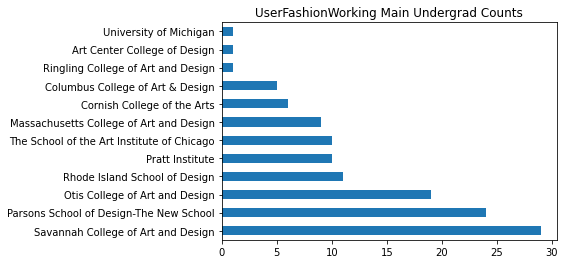


UserFashionWorking Birth Year Counts:



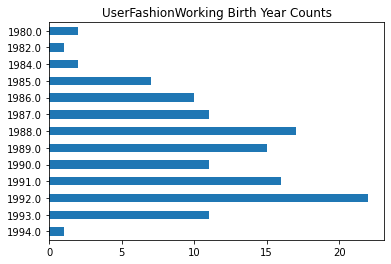


UserFashionWorking EndMonthYear Counts:



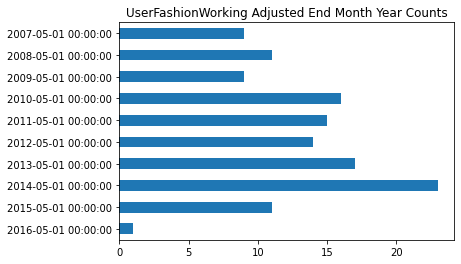

In [ ]:
### All About UserFashionWorking
print(f'UserFashionWorking has {UserFashionWorking.shape[0]} records')

print(f'\nUserFashionWorking Data Types:{UserFashionWorking.dtypes}')

print(f"\nUserFashionWorking First Name Counts:\n{UserFashionWorking['First_Name'].nunique()}")
print(f"\nUserFashionWorking Last Name Counts:\n{UserFashionWorking['Last_Name'].nunique()}")

print(f"\nUserFashionWorking Gender Counts:\n{UserFashionWorking['Gender'].value_counts()}")

print(f"\nUserFashionWorking Main Undergrad Counts:\n")
UserFashionWorking['MainUndergrad'].value_counts().plot.barh()
plt.title('UserFashionWorking Main Undergrad Counts')
plt.show()

print(f"\nUserFashionWorking Birth Year Counts:\n")
UserFashionWorking['Birth Year'].value_counts().sort_index(ascending = False).plot.barh()
plt.title('UserFashionWorking Birth Year Counts')
plt.show()

print(f"\nUserFashionWorking EndMonthYear Counts:\n")
UserFashionWorking['AdjustedEndMonthYear'].value_counts().sort_index(ascending = False).plot.barh()
plt.title('UserFashionWorking Adjusted End Month Year Counts')
plt.show()


### EduFashionWorking

EduFashionWorking has 224 records

EduFashionWorking describes 126 unique people

EduFashionWorking Data Types:
Person_ID                          int64
Major                             object
Normalized Degree                 object
EduEventType                      object
AICAD Degree Name                 object
School_Name                       object
Start_Date                        object
StartMonthYear                    object
AdjustedStartMonthYear    datetime64[ns]
StartYear                        float64
End_Date                          object
EndMonthYear                      object
AdjustedEndMonthYear      datetime64[ns]
EndYear                            int64
City                              object
State                             object
Country                           object
dtype: object

EduFashionWorking Majors:
102 unique majors
Major (with more than 1 entry) Counts :
Fashion Apparel Design                    51
Fashion Design                            36
Ap

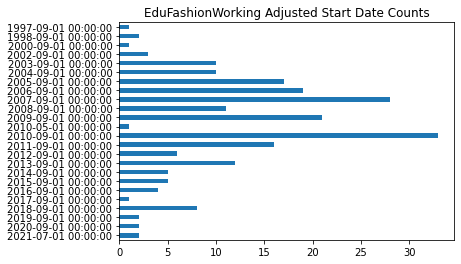

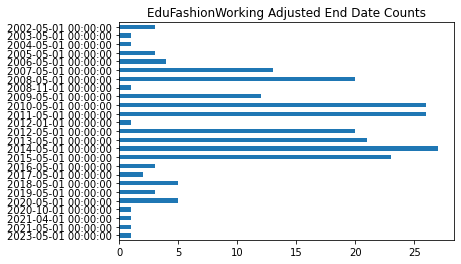


EduFashionWorking has 59 unique City values

EduFashionWorking City (with more than 1 entry) Counts :
New York       32
Savannah       30
Los Angeles    23
Providence     15
Columbus       13
Boston         12
Chicago        11
Brooklyn       11
London          7
Online          5
Paris           3
Seattle         3
New Delhi       2
San Juan        2
Detroit         2
Cambridge       2
Rio Piedras     2
Fort Myers      2
Name: City, dtype: int64

EduFashionWorking has 23 unique State values

EduFashionWorking State (with more than 1 entry) Counts :
NY    45
GA    31
CA    27
MA    16
RI    16
OH    14
IL    11
FL     4
WA     3
MI     3
PA     2
TN     2
Name: State, dtype: int64

EduFashionWorking Country Counts :
USA            183
UK               7
France           5
Italy            3
India            2
Mexico           2
Puerto Rico      2
China            1
Argentina        1
Egypt            1
Canada           1
Denmark          1
Taiwan           1
Morocco          1
Japan  

In [ ]:
### All About EduFashionWorking
print(f'EduFashionWorking has {EduFashionWorking.shape[0]} records')
print(f"\nEduFashionWorking describes {EduFashionWorking['Person_ID'].nunique()} unique people")

print(f'\nEduFashionWorking Data Types:\n{EduFashionWorking.dtypes}')

print(f"\nEduFashionWorking Majors:\n{EduFashionWorking['Major'].nunique()} unique majors")
print(f"Major (with more than 1 entry) Counts :\n{EduFashionWorking['Major'].value_counts()[EduFashionWorking['Major'].value_counts()>1]}")

print(f"\nEduFashionWorking Normalized Degree Counts:\n{EduFashionWorking['Normalized Degree'].value_counts()}")

print(f"\nEduFashionWorking Educational Event Type Degree Counts:\n{EduFashionWorking['EduEventType'].value_counts()}")

print(f"\nEduFashionWorking AICAD Degree Counts:\n{EduFashionWorking['AICAD Degree Name'].value_counts()}")

print(f"\nEduFashionWorking has {EduFashionWorking['School_Name'].nunique()} unique School Name values")
print(f"\nEduFashionWorking School Name (with more than 1 entry) Counts :\n{EduFashionWorking['School_Name'].value_counts()[EduFashionWorking['School_Name'].value_counts()>1]}") # 87 different schools, 71 schools have only 1 entry

EduFashionWorking['AdjustedStartMonthYear'].value_counts().sort_index(ascending = False).plot.barh() #currenly an aesthetic nighmare <3
plt.title('EduFashionWorking Adjusted Start Date Counts')
plt.show()
print('\n')
EduFashionWorking['AdjustedEndMonthYear'].value_counts().sort_index(ascending = False).plot.barh() #currenly an aesthetic nighmare <3
plt.title('EduFashionWorking Adjusted End Date Counts')
plt.show()

print(f"\nEduFashionWorking has {EduFashionWorking['City'].nunique()} unique City values")
print(f"\nEduFashionWorking City (with more than 1 entry) Counts :\n{EduFashionWorking['City'].value_counts()[EduFashionWorking['City'].value_counts()>1]}")

print(f"\nEduFashionWorking has {EduFashionWorking['State'].nunique()} unique State values")
print(f"\nEduFashionWorking State (with more than 1 entry) Counts :\n{EduFashionWorking['State'].value_counts()[EduFashionWorking['State'].value_counts()>1]}")

print(f"\nEduFashionWorking Country Counts :\n{EduFashionWorking['Country'].value_counts()}")

### FashionJobsWorking

FashionJobsWorking has 1015 records

FashionJobsWorking describes 126 unique people

FashionJobsWorking Data Types:
Person_ID                              int64
Job_Title                             object
Job Type                              object
Job Level                             object
SOC Code                              object
Company                               object
Company Type                          object
Subindustry                           object
StartRank                              int64
Start Rank after Undergrad           float64
StartMonthYear                datetime64[ns]
StartYear                              int64
EndMonthYear                  datetime64[ns]
Length of Time in Job                float64
Graduation Date                       object
Years from Graduation                float64
Job during Undergrad                  object
Job After Undergrad                   object
Job while other job                  float64
Company Pivot                

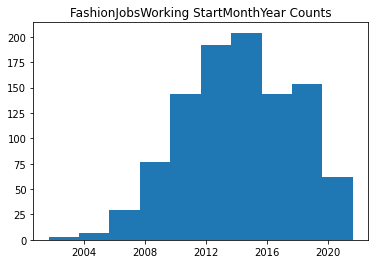

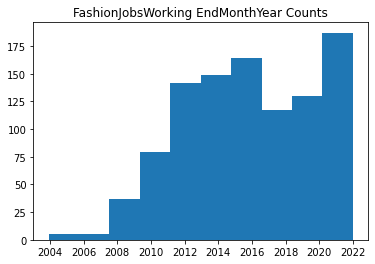

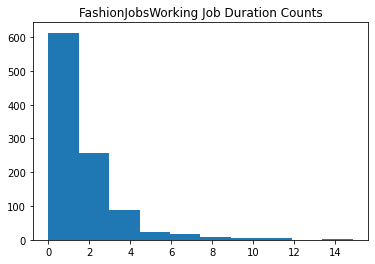


FashionJobsWorking Job during UGrad Counts:
No     741
Yes    274
Name: Job during Undergrad, dtype: int64

FashionJobsWorking Company Pivot Counts:
First Job        603
Company Pivot    352
Same Company      60
Name: Company Pivot, dtype: int64

FashionJobsWorking Industry Pivot Counts:
First Job         603
Same Industry     321
Industry Pivot     91
Name: Industry Pivot, dtype: int64

FashionJobsWorking Profession Pivot Counts:
First Job           603
Same Profession     258
Profession Pivot    154
Name: Profession Pivot, dtype: int64


In [ ]:
### All About FashionJobsWorking
print(f'FashionJobsWorking has {FashionJobsWorking.shape[0]} records')
print(f"\nFashionJobsWorking describes {FashionJobsWorking['Person_ID'].nunique()} unique people")

print(f'\nFashionJobsWorking Data Types:\n{FashionJobsWorking.dtypes}')

print(f"\nFashionJobsWorking Job Titles:\n{FashionJobsWorking['Job_Title'].nunique()} unique titles")
print(f"Job Title (with more than 5 entries) Counts :\n{FashionJobsWorking['Job_Title'].value_counts()[FashionJobsWorking['Job_Title'].value_counts()>5]}")

print(f"\nFashionJobsWorking Job Type Counts:\n{FashionJobsWorking['Job Type'].value_counts()}")

print(f"\nFashionJobsWorking Job Level Counts:\n{FashionJobsWorking['Job Level'].value_counts()}")

print(f"\nFashionJobsWorking SOC Code Counts:\n{FashionJobsWorking['SOC Code'].value_counts()}")

print(f"\nFashionJobsWorking Company:\n{FashionJobsWorking['Company'].nunique()} unique companies")
print(f"Company (with more than 5 entries) Counts :\n{FashionJobsWorking['Company'].value_counts()[FashionJobsWorking['Company'].value_counts()>5]}")

print(f"\nFashionJobsWorking Company Type Counts:\n{FashionJobsWorking['Company Type'].value_counts()}")

print(f"\nFashionJobsWorking Subindustry Counts:\n{FashionJobsWorking['Subindustry'].value_counts()}")

FashionJobsWorking.hist('StartMonthYear')
plt.title(f"FashionJobsWorking StartMonthYear Counts")
plt.grid(False)
plt.show()

FashionJobsWorking.hist('EndMonthYear')
plt.title(f"FashionJobsWorking EndMonthYear Counts")
plt.grid(False)
plt.show()

FashionJobsWorking.hist('Length of Time in Job')
plt.title(f"FashionJobsWorking Job Duration Counts")
plt.grid(False)
plt.show()

print(f"\nFashionJobsWorking Job during UGrad Counts:\n{FashionJobsWorking['Job during Undergrad'].value_counts()}") # yes means during, no means after

print(f"\nFashionJobsWorking Company Pivot Counts:\n{FashionJobsWorking['Company Pivot'].value_counts()}")
print(f"\nFashionJobsWorking Industry Pivot Counts:\n{FashionJobsWorking['Industry Pivot'].value_counts()}")
print(f"\nFashionJobsWorking Profession Pivot Counts:\n{FashionJobsWorking['Profession Pivot'].value_counts()}")
# FashionJobsWorking[['Company Pivot','Industry Pivot','Profession Pivot']]

### UserNames

UserNames has 1201 records

UserNames describes either 1201 or 1157 unique people

UserNames Data Types:
Old_Person_ID                    int64
Person_ID                        int64
First_Name                      object
Last_Name                       object
File_Name                       object
LinkedIn URL                    object
Gender                          object
Birth Year                       int64
AICAD / Art School              object
AdjustedEndMonthYear    datetime64[ns]
dtype: object

UserNames First Name Counts:
750

UserNames Last Name Counts:
1017

UserNames Gender Counts:
F    781
M    420
Name: Gender, dtype: int64

UserNames Main AICAD / Art School' Counts:



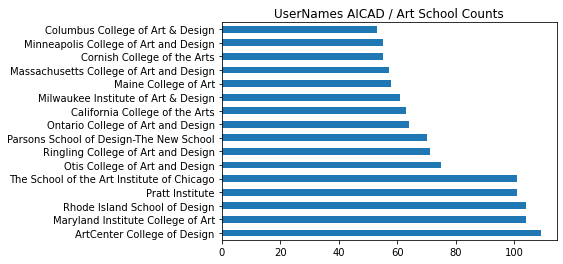


UserNames EndMonthYear Counts:



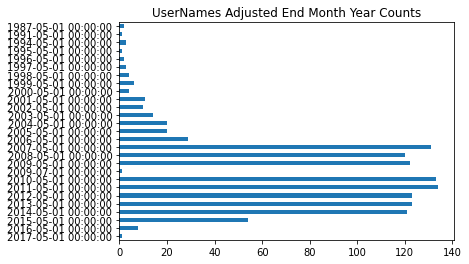

In [ ]:
### All About UserNames
print(f'UserNames has {UserNames.shape[0]} records')
print(f"\nUserNames describes either {UserNames['Person_ID'].nunique()} or {UserNames['Old_Person_ID'].nunique()} unique people")

print(f'\nUserNames Data Types:\n{UserNames.dtypes}')

print(f"\nUserNames First Name Counts:\n{UserNames['First_Name'].nunique()}")
print(f"\nUserNames Last Name Counts:\n{UserNames['Last_Name'].nunique()}")

print(f"\nUserNames Gender Counts:\n{UserNames['Gender'].value_counts()}")

print(f"\nUserNames Main AICAD / Art School' Counts:\n")
UserNames['AICAD / Art School'].value_counts().plot.barh()
plt.title('UserNames AICAD / Art School Counts')
plt.show()

print(f"\nUserNames EndMonthYear Counts:\n")
UserNames['AdjustedEndMonthYear'].value_counts().sort_index(ascending = False).plot.barh()
plt.title('UserNames Adjusted End Month Year Counts')
plt.show()

### Education

Education has 2410 records

Education describes 1320 unique people

Education Data Types:
ID                               float64
PersonID                           int64
Major                             object
Normalized Degree                 object
AICADMajorName                    object
SchoolName                        object
StartDate                         object
StartMonthYear                    object
AdjustedStartMonthYear    datetime64[ns]
StartYear                          int64
EndDate                           object
EndMonthYear                      object
AdjustedEndMonthYear      datetime64[ns]
EndYear                            int64
Length                           float64
City                              object
State                             object
Country                           object
dtype: object

Education Majors:
962 unique majors
Major (with more than 10 entries) Counts :
Graphic Design                            241
Industrial Design               

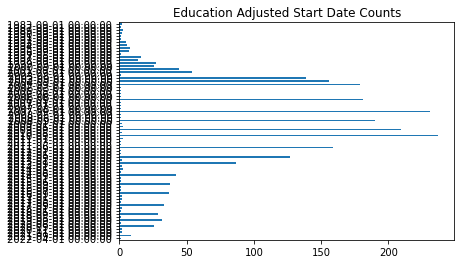

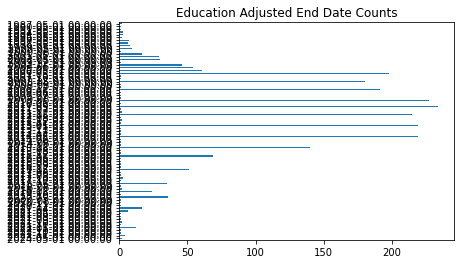

count    2408.000000
mean     1157.021595
std       579.699746
min        20.000000
25%       850.000000
50%      1216.000000
75%      1581.000000
max      4868.000000
Name: Length, dtype: float64


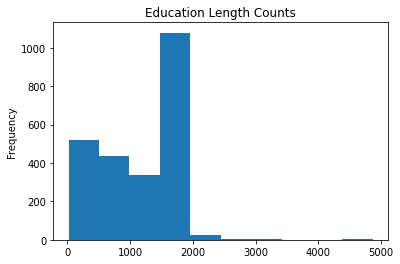


Education has 272 unique City values

Education City (with more than 10 entries) Counts :
Providence       155
New York         152
Ann Arbor        133
Chicago          122
Pasadena         117
Baltimore        117
Brooklyn         108
Los Angeles       83
Boston            77
Sarasota          76
Seattle           71
Milwaukee         68
Columbus          64
Minneapolis       63
Online            26
Cambridge         22
London            21
Florence          15
San Francisco     13
Name: City, dtype: int64

Education has 50 unique State values

Education State (with more than 5 entries) Counts :
NY    280
CA    260
RI    158
MI    150
IL    126
MD    122
MA    120
FL     90
WA     78
WI     75
OH     73
MN     71
PA     24
TX     13
IN     10
CT      8
MO      8
ME      8
NC      7
DC      6
OR      6
Name: State, dtype: int64

Education Country Counts :
USA                 1736
UK                    27
Italy                 21
France                17
Denmark               10
China

In [ ]:
### All About EduFashionWorking
print(f'Education has {Education.shape[0]} records')
print(f"\nEducation describes {Education['PersonID'].nunique()} unique people")

print(f'\nEducation Data Types:\n{Education.dtypes}')

print(f"\nEducation Majors:\n{Education['Major'].nunique()} unique majors")
print(f"Major (with more than 10 entries) Counts :\n{Education['Major'].value_counts()[Education['Major'].value_counts()>10]}")

print(f"\nEducation Normalized Degrees: \n{Education['Normalized Degree'].nunique()} unique degrees")
print(f"Degree (with more than 10 entries) Counts :\n{Education['Normalized Degree'].value_counts()[Education['Normalized Degree'].value_counts()>10]}")

print(f"\nEducation AICAD Major Counts:\n{Education['AICADMajorName'].value_counts()}")

print(f"\nEducation has {Education['SchoolName'].nunique()} unique School Name values")
print(f"\nEducation School Name (with more than 10 entries) Counts :\n{Education['SchoolName'].value_counts()[Education['SchoolName'].value_counts()>10]}")

Education['AdjustedStartMonthYear'].value_counts().sort_index(ascending = False).plot.barh() #currenly an aesthetic nighmare <3
plt.title('Education Adjusted Start Date Counts')
plt.show()
print('\n')
Education['AdjustedEndMonthYear'].value_counts().sort_index(ascending = False).plot.barh() #currenly an aesthetic nighmare <3
plt.title('Education Adjusted End Date Counts')
plt.show()

print(Education['Length'].describe())
Education['Length'].plot.hist()
plt.title('Education Length Counts')
plt.show()

print(f"\nEducation has {Education['City'].nunique()} unique City values")
print(f"\nEducation City (with more than 10 entries) Counts :\n{Education['City'].value_counts()[Education['City'].value_counts()>10]}")

print(f"\nEducation has {Education['State'].nunique()} unique State values")
print(f"\nEducation State (with more than 5 entries) Counts :\n{Education['State'].value_counts()[Education['State'].value_counts()>5]}")

print(f"\nEducation Country Counts :\n{Education['Country'].value_counts()}")

### Jobs

Jobs has 10248 records

Jobs describes 1203 unique people

Jobs Data Types:
ID                                      object
Person_ID                                int64
Job_Title                               object
Job Level Keyword                       object
Job Level                               object
SOC Keyword                             object
SOC Code                                object
Adjusted SOC Code (use this)            object
Company                                 object
Career Community                        object
Sub-industry                            object
Start_Date                              object
Reverse Chrono Job Order                 int64
Chrono Job Order                         int64
StartMonthYear                  datetime64[ns]
StartYear                                int64
End_Date                                object
EndMonthYear                    datetime64[ns]
End Year                                 int64
Time in Job                    

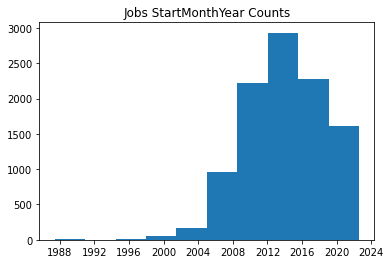

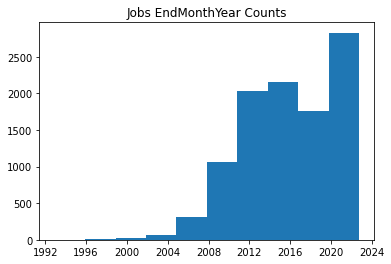

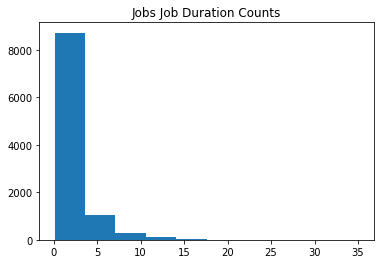


Jobs has 721 unique City values

Jobs City (with more than 50 entries) Counts :
New York                  1289
San Francisco              449
Los Angeles                414
Chicago                    327
Boston                     260
Seattle                    217
Portland                   186
Toronto                    168
San Francisco Bay Area     136
Brooklyn                   135
Minneapolis                111
Columbus                   106
Baltimore                   97
Providence                  89
Milwaukee                   82
Cambridge                   74
Santa Monica                66
Philadelphia                61
Atlanta                     51
Name: City, dtype: int64

Jobs has 108 unique State values

Jobs State (with more than 10 entries) Counts :
CA     1613
NY     1517
MA      520
IL      354
WA      291
MN      175
ON      155
OR      136
FL      130
RI      129
WI      126
ME      123
MD      114
OH       88
PA       82
TX       77
OH       75
GA       58
CO    

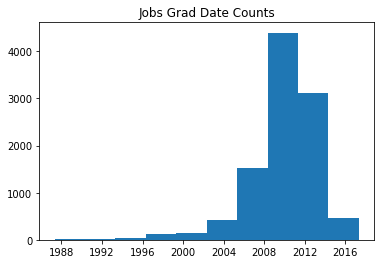


Jobs Job Post-Graduation Counts :
After            7943
Before/During    2305
Name: Job Post Graduation, dtype: int64

Jobs UnderGrad College Counts:
Pratt Institute                               972
Maryland Institute College of Art             919
The School of the Art Institute of Chicago    881
Rhode Island School of Design                 868
Art Center College of Design                  861
California College of the Arts                618
Otis College of Art and Design                585
Parsons School of Design-The New School       559
Ontario College of Art and Design             557
Minneapolis College of Art and Design         511
Massachusetts College of Art and Design       487
Ringling College of Art and Design            476
Columbus College of Art & Design              472
Cornish College of the Arts                   435
Maine College of Art                          420
Milwaukee Institute of Art & Design           410
Ringling School of Art and Design             149

In [ ]:
### All About Jobs
print(f'Jobs has {Jobs.shape[0]} records')
print(f"\nJobs describes {Jobs['Person_ID'].nunique()} unique people")

print(f'\nJobs Data Types:\n{Jobs.dtypes}')

print(f"\nJobs Job Titles:\n{Jobs['Job_Title'].nunique()} unique titles")
print(f"Job Title (with more than 50 entries) Counts :\n{Jobs['Job_Title'].value_counts()[Jobs['Job_Title'].value_counts()>50]}")

print(f"\nJobs Job Level Keywords:\n{Jobs['Job Level Keyword'].nunique()} unique keywords")
print(f"Job Level Keywords (with more than 50 entries) Counts :\n{Jobs['Job Level Keyword'].value_counts()[Jobs['Job Level Keyword'].value_counts()>50]}")

print(f"\nJob Level Counts :\n{Jobs['Job Level'].value_counts()}")

print(f"\nJobs SOC Keywords:\n{Jobs['SOC Keyword'].nunique()} unique keywords")
print(f"SOC Keywords (with more than 50 entries) Counts :\n{Jobs['SOC Keyword'].value_counts()[Jobs['SOC Keyword'].value_counts()>50]}")

print(f"\nJobs SOC Code Counts:\n{Jobs['SOC Code'].value_counts().sort_index()}")

print(f"\nJobs Adjusted SOC Code Counts:\n{Jobs['Adjusted SOC Code (use this)'].value_counts().sort_index()}")

print(f"\nJobs Company:\n{Jobs['Company'].nunique()} unique companies")
print(f"Company (with more than 20 entries) Counts :\n{Jobs['Company'].value_counts()[Jobs['Company'].value_counts()>20]}")

print(f"\nJobs Career Community Counts:\n{Jobs['Career Community'].value_counts()}")

print(f"\nJobs Subindustry Counts:\n{Jobs['Sub-industry'].value_counts()}")

Jobs.hist('StartMonthYear')
plt.title(f"Jobs StartMonthYear Counts")
plt.grid(False)
plt.show()

Jobs.hist('EndMonthYear')
plt.title(f"Jobs EndMonthYear Counts")
plt.grid(False)
plt.show()

Jobs.hist('Time in Job')
plt.title(f"Jobs Job Duration Counts")
plt.grid(False)
plt.show()

print(f"\nJobs has {Jobs['City'].nunique()} unique City values")
print(f"\nJobs City (with more than 50 entries) Counts :\n{Jobs['City'].value_counts()[Jobs['City'].value_counts()>50]}")

print(f"\nJobs has {Jobs['State'].nunique()} unique State values")
print(f"\nJobs State (with more than 10 entries) Counts :\n{Jobs['State'].value_counts()[Jobs['State'].value_counts()>10]}")

print(f"\nJobs Country Counts :\n{Jobs['Country'].value_counts()}")

Jobs.hist('Grad Date')
plt.title(f"Jobs Grad Date Counts")
plt.grid(False)
plt.show()

print(f"\nJobs Job Post-Graduation Counts :\n{Jobs['Job Post Graduation'].value_counts()}")

print(f"\nJobs UnderGrad College Counts:\n{Jobs['UnderGrad College'].value_counts()}")

print(f"\nJobs Company Pivot Counts:\n{Jobs['Company Pivot'].value_counts()}")
print(f"\nJobs Industry Pivot Counts:\n{Jobs['Industry Pivot'].value_counts()}")
print(f"\nJobs Profession Pivot Counts:\n{Jobs['Profession Pivot'].value_counts()}")

### MergeTable

MergeTable has 12413 records

MergeTable describes 1201 unique people

MergeTable Data Types:
ID                                   int64
Person_ID                            int64
JoborEdu                            object
Job_Title                           object
Internship                          object
Normalized Degree                   object
MajorDegreeTitleJob                 object
AICAD Major Name                    object
Job Level                           object
MergedSOCodes                       object
OrganizationName                    object
Career Community                    object
Sub-industry                        object
Start_Date                          object
Reverse Chrono Job Order           float64
Chrono Job Order                   float64
StartMonthYear              datetime64[ns]
StartYear                            int64
End_Date                            object
EndMonthYear                datetime64[ns]
End Year                             int64
Tim

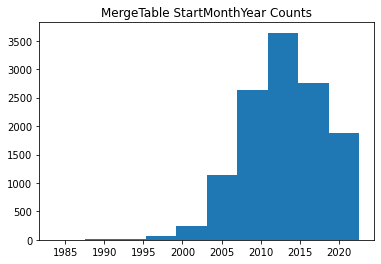

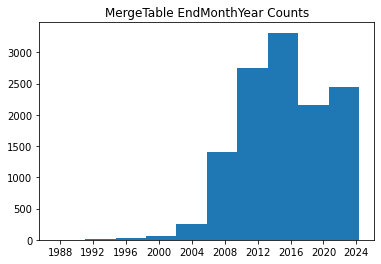


MergeTable Time in Job Sumary:

count    12412.000000
mean         2.218627
std          2.446667
min          0.100000
25%          0.600000
50%          1.500000
75%          3.100000
max         35.100000
Name: Time in Job, dtype: float64

MergeTable has 856 unique City values

MergeTable City (with more than 50 entries) Counts :
New York                  1433
Los Angeles                496
San Francisco              460
Chicago                    446
Boston                     337
Seattle                    287
Providence                 244
Brooklyn                   242
Baltimore                  213
Portland                   195
Minneapolis                173
Toronto                    168
Columbus                   166
Pasadena                   153
Milwaukee                  149
San Francisco Bay Area     127
Sarasota                   106
Cambridge                   94
Philadelphia                69
Santa Monica                66
Washington                  55
Atlanta      

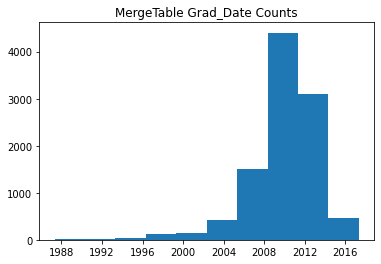


MergeTable Job Post Graduation Counts :
After            7923
Before/During    2301
Name: Job Post Graduation, dtype: int64

MergeTable UnderGrad College Counts :
Pratt Institute                               971
Maryland Institute College of Art             919
The School of the Art Institute of Chicago    881
Rhode Island School of Design                 868
Art Center College of Design                  861
California College of the Arts                599
Otis College of Art and Design                585
Parsons School of Design-The New School       559
Ontario College of Art and Design             557
Minneapolis College of Art and Design         511
Massachusetts College of Art and Design       487
Ringling College of Art and Design            476
Columbus College of Art & Design              468
Cornish College of the Arts                   435
Maine College of Art                          420
Milwaukee Institute of Art & Design           410
Ringling School of Art and Design   

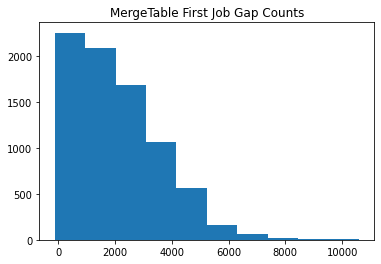


MergeTable Company Pivot Counts:
Company Pivot    5337
Same Company     1394
First Job        1194
Name: Company Pivot, dtype: int64

MergeTable Industry Pivot Counts:
Industry Pivot    3816
Same Industry     2915
First Job         1194
Name: Industry Pivot, dtype: int64

MergeTable Profession Pivot Counts:
Profession Pivot    4299
Same Profession     2432
First Job           1194
Name: Profession Pivot, dtype: int64


In [ ]:
### All About MergeTable
print(f'MergeTable has {MergeTable.shape[0]} records')
print(f"\nMergeTable describes {MergeTable['Person_ID'].nunique()} unique people")

print(f'\nMergeTable Data Types:\n{MergeTable.dtypes}')

print(f"\nMergeTable Job or Edu Counts :\n{MergeTable['JoborEdu'].value_counts()}")

print(f"\nMergeTable Job Titles:\n{MergeTable['Job_Title'].nunique()} unique titles")
print(f"\nJob Titles (with more than 50 entries) Counts :\n{MergeTable['Job_Title'].value_counts()[MergeTable['Job_Title'].value_counts()>50]}")

print(f"\nMergeTable has {MergeTable['Internship'].value_counts()['Internship']} Internship entries")

print(f"\nMergeTable Normalized Degrees: \n{MergeTable['Normalized Degree'].nunique()} unique degrees")
print(f"Degree (with more than 10 entries) Counts :\n{MergeTable['Normalized Degree'].value_counts()[MergeTable['Normalized Degree'].value_counts()>10]}")

print(f"\nMergeTable describes {MergeTable['MajorDegreeTitleJob'].nunique()} unique Majors/Degrees/Titles/Jobs")

print(f"\nMergeTable AICAD Majors:\n{MergeTable['AICAD Major Name'].nunique()} unique AICAD major names")
print(f"Major (with more than 10 entries) Counts :\n{MergeTable['AICAD Major Name'].value_counts()[MergeTable['AICAD Major Name'].value_counts()>10]}")

print(f"\nMergeTable Job Level Counts :\n{MergeTable['Job Level'].value_counts()}")

print(f"\nMergeTable Merged SOC Codes:\n{MergeTable['MergedSOCodes'].nunique()} unique codes")
print(f"Codes (with more than 10 entries) Counts :\n{MergeTable['MergedSOCodes'].value_counts()[MergeTable['MergedSOCodes'].value_counts()>10]}")

print(f"\nMergeTable Organization Names:\n{MergeTable['OrganizationName'].nunique()} unique organizations")
print(f"Organizations (with more than 25 entries) Counts :\n{MergeTable['OrganizationName'].value_counts()[MergeTable['OrganizationName'].value_counts()>25]}")

print(f"\nMergeTable Career Community Counts :\n{MergeTable['Career Community'].value_counts()}")

print(f"\nMergeTable Sub-industry Counts :\n{MergeTable['Sub-industry'].value_counts()}")

MergeTable.hist('StartMonthYear')
plt.title(f"MergeTable StartMonthYear Counts")
plt.grid(False)
plt.show()

MergeTable.hist('EndMonthYear')
plt.title(f"MergeTable EndMonthYear Counts")
plt.grid(False)
plt.show()

print(f"\nMergeTable Time in Job Sumary:\n")
print(MergeTable['Time in Job'].describe())

print(f"\nMergeTable has {MergeTable['City'].nunique()} unique City values")
print(f"\nMergeTable City (with more than 50 entries) Counts :\n{MergeTable['City'].value_counts()[MergeTable['City'].value_counts()>50]}")

print(f"\nMergeTable has {MergeTable['State'].nunique()} unique State values")
print(f"\nMergeTable State (with more than 20 entries) Counts :\n{MergeTable['State'].value_counts()[MergeTable['State'].value_counts()>20]}")

print(f"\nMergeTable Country Counts :\n{MergeTable['Country'].value_counts()}")

MergeTable.hist('Grad_Date')
plt.title(f"MergeTable Grad_Date Counts")
plt.grid(False)
plt.show()

print(f"\nMergeTable Job Post Graduation Counts :\n{MergeTable['Job Post Graduation'].value_counts()}")

print(f"\nMergeTable UnderGrad College Counts :\n{MergeTable['UnderGrad College'].value_counts()}")

MergeTable.hist('FirstJobGap')
plt.title(f"MergeTable First Job Gap Counts")
plt.grid(False)
plt.show()

print(f"\nMergeTable Company Pivot Counts:\n{MergeTable['Company Pivot'].value_counts()}")
print(f"\nMergeTable Industry Pivot Counts:\n{MergeTable['Industry Pivot'].value_counts()}")
print(f"\nMergeTable Profession Pivot Counts:\n{MergeTable['Profession Pivot'].value_counts()}")

### SalarybySOC

SalarybySOC has 59 records


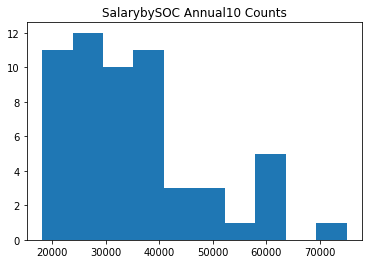

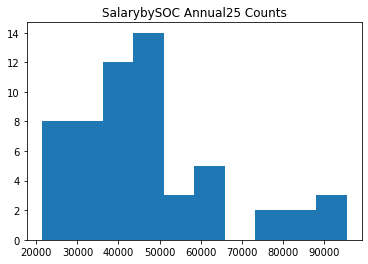

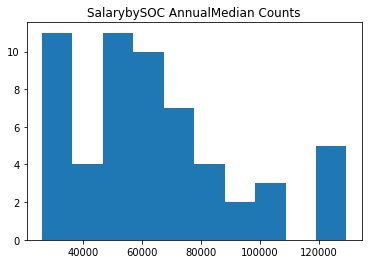

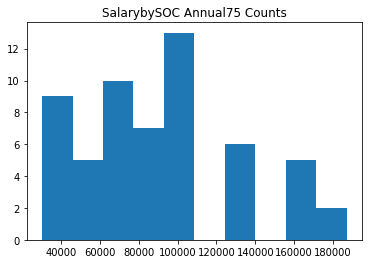

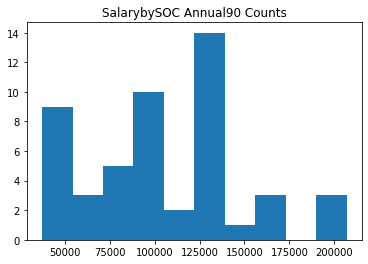

In [ ]:
### All About SalarybySOC
print(f'SalarybySOC has {SalarybySOC.shape[0]} records')

SalarybySOC.hist('Annual10')
plt.title(f"SalarybySOC Annual10 Counts")
plt.grid(False)
plt.show()

SalarybySOC.hist('Annual25')
plt.title(f"SalarybySOC Annual25 Counts")
plt.grid(False)
plt.show()

SalarybySOC.hist('AnnualMedian')
plt.title(f"SalarybySOC AnnualMedian Counts")
plt.grid(False)
plt.show()

SalarybySOC.hist('Annual75')
plt.title(f"SalarybySOC Annual75 Counts")
plt.grid(False)
plt.show()

SalarybySOC.hist('Annual90')
plt.title(f"SalarybySOC Annual90 Counts")
plt.grid(False)
plt.show()

## External Data

### SalariesByCollege

SalariesByCollege has 269 records

SalariesByCollege Data Types:
School Name                           object
School Type                           object
Starting Median Salary               float64
Mid-Career Median Salary             float64
Mid-Career 10th Percentile Salary    float64
Mid-Career 25th Percentile Salary    float64
Mid-Career 75th Percentile Salary    float64
Mid-Career 90th Percentile Salary    float64
dtype: object

SalariesByCollege Scbool Type Counts:
State           175
Liberal Arts     47
Party            20
Engineering      19
Ivy League        8
Name: School Type, dtype: int64


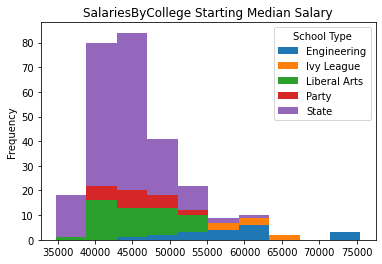

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


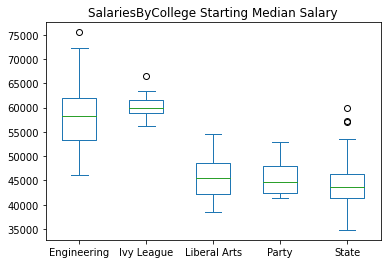

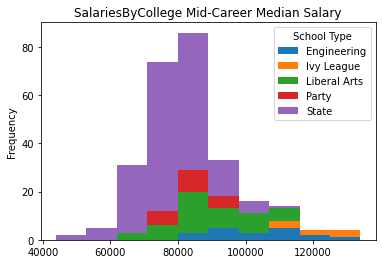

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


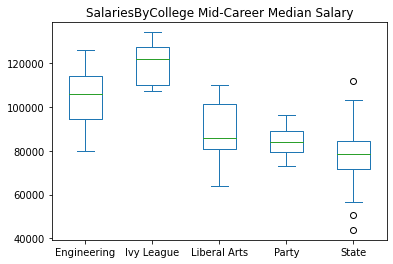

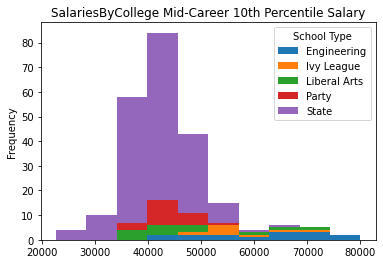

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


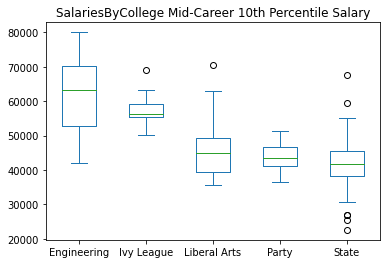

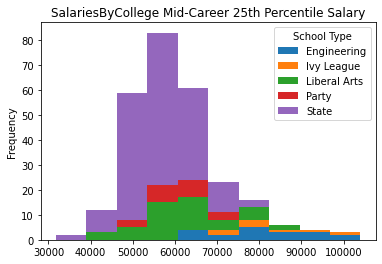

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


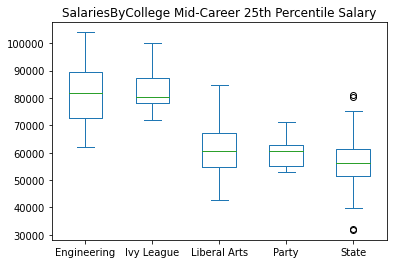

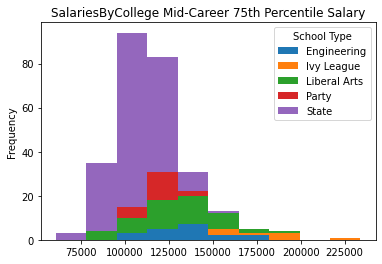

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


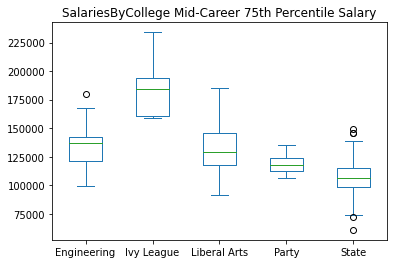

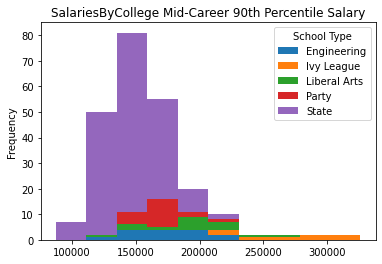

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


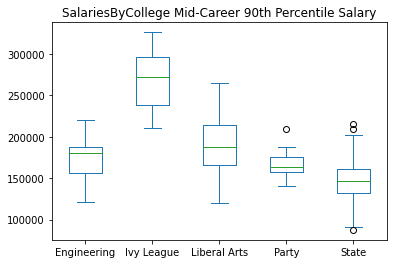

In [ ]:
### All About SalariesByCollege
print(f'SalariesByCollege has {SalariesByCollege.shape[0]} records')

print(f'\nSalariesByCollege Data Types:\n{SalariesByCollege.dtypes}')

print(f"\nSalariesByCollege Scbool Type Counts:\n{SalariesByCollege['School Type'].value_counts()}")

for col in SalariesByCollege.columns[2:]:
  SalariesByCollege.pivot(columns = 'School Type')[col].plot(kind = 'hist', stacked=True)
  plt.title(f"SalariesByCollege {col}")
  plt.grid(False)
  plt.show()
  SalariesByCollege.pivot(columns = 'School Type')[col].plot(kind = 'box')
  plt.title(f"SalariesByCollege {col}")
  plt.show()
  print('\n')

### DegreesThatPayBack

DegreesThatPayBack has 50 records

DegreesThatPayBack Data Types:
Undergraduate Major                                   object
Starting Median Salary                               float64
Mid-Career Median Salary                             float64
Percent change from Starting to Mid-Career Salary    float64
Mid-Career 10th Percentile Salary                    float64
Mid-Career 25th Percentile Salary                    float64
Mid-Career 75th Percentile Salary                    float64
Mid-Career 90th Percentile Salary                    float64
dtype: object


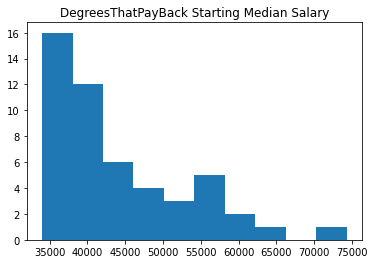

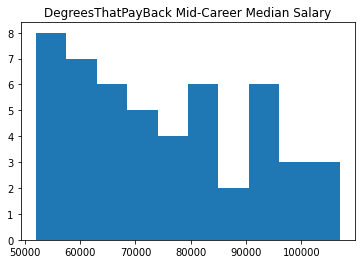

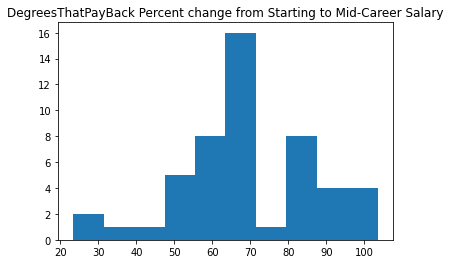

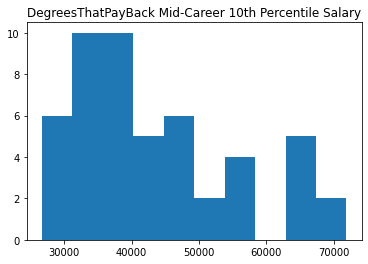

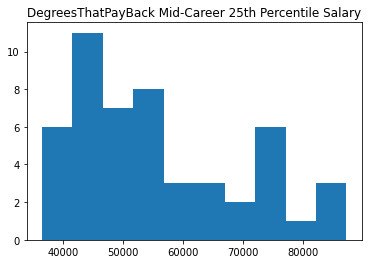

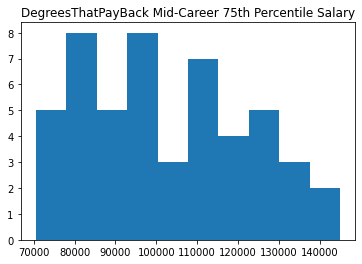

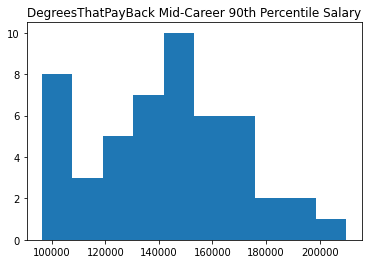

In [ ]:
### All About DegreesThatPayBack
print(f'DegreesThatPayBack has {DegreesThatPayBack.shape[0]} records')

print(f'\nDegreesThatPayBack Data Types:\n{DegreesThatPayBack.dtypes}')


for col in DegreesThatPayBack.columns[1:]:
  DegreesThatPayBack.hist(col)
  plt.title(f"DegreesThatPayBack {col}")
  plt.grid(False)
  plt.show()
  print('\n')

### maybe errorbar plot for midcareer stuff?
### or a scatter plot

### SalariesByRegion

SalariesByRegion has 320 records

SalariesByRegion Data Types:
School Name                           object
Region                                object
Starting Median Salary               float64
Mid-Career Median Salary             float64
Mid-Career 10th Percentile Salary    float64
Mid-Career 25th Percentile Salary    float64
Mid-Career 75th Percentile Salary    float64
Mid-Career 90th Percentile Salary    float64
dtype: object

SalariesByRegion Region Counts:
Northeastern    100
Southern         79
Midwestern       71
Western          42
California       28
Name: Region, dtype: int64


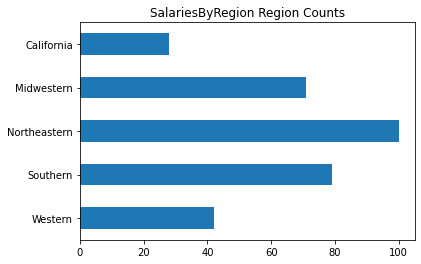

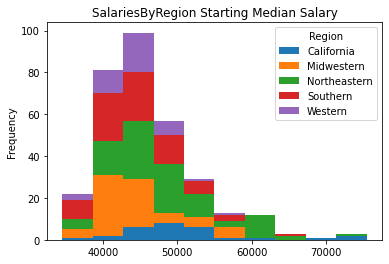

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


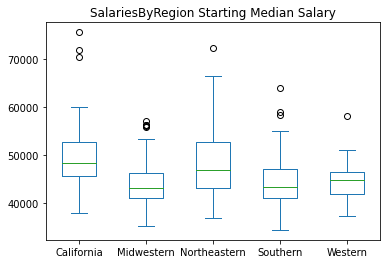

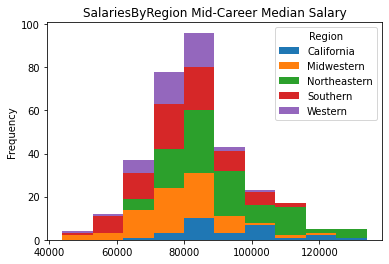

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


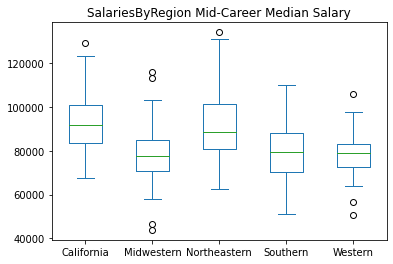

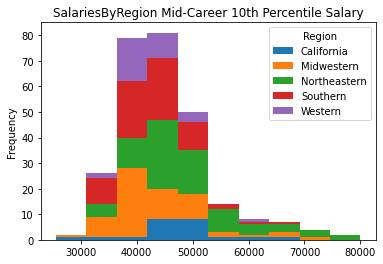

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


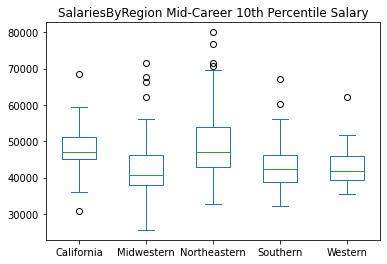

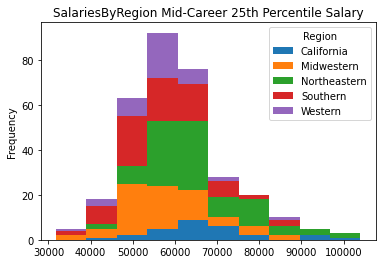

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


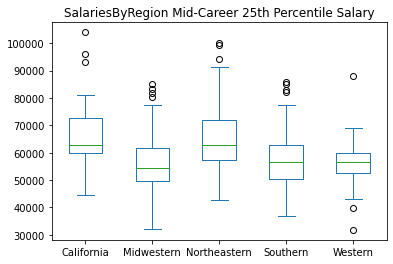

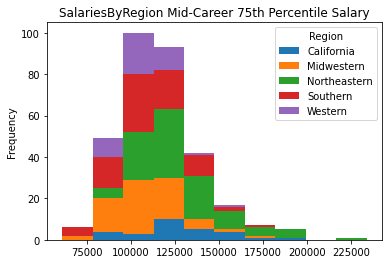

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


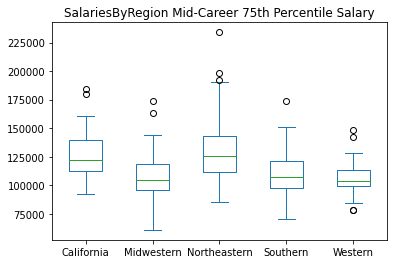

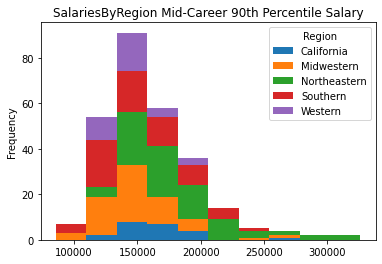

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


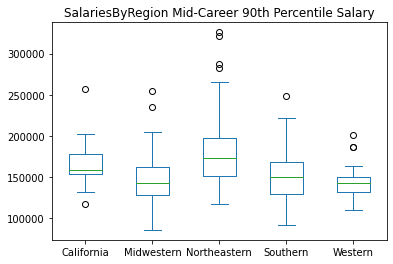

In [ ]:
### All About SalariesByRegion
print(f'SalariesByRegion has {SalariesByRegion.shape[0]} records')

print(f'\nSalariesByRegion Data Types:\n{SalariesByRegion.dtypes}')

print(f"\nSalariesByRegion Region Counts:\n{SalariesByRegion['Region'].value_counts()}")
SalariesByRegion['Region'].value_counts().sort_index(ascending = False).plot.barh()
# plt.bar(SalariesByRegion.Index(),SalariesByRegion['Region'].value_counts())
plt.title('SalariesByRegion Region Counts')
plt.show()

for col in SalariesByRegion.columns[2:]:
  print('\n')
  SalariesByRegion.pivot(columns = 'Region')[col].plot(kind = 'hist', stacked=True)
  plt.title(f"SalariesByRegion {col}")
  plt.grid(False)
  plt.show()
  SalariesByRegion.pivot(columns = 'Region')[col].plot(kind = 'box')
  plt.title(f"SalariesByRegion {col}")
  plt.show()
